In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv('combined_retail_price_data1.csv', delimiter=',')
wholesale = pd.read_csv('combined_wholesale_price_data_newwww.csv', delimiter=',')
retail

States/UTs   Rice  Wheat Atta (Wheat) Gram Dal Tur/Arhar Dal  \
0            Average Price  42.01  29.99        35.32    80.18        144.67   
1            Maximum Price     65     59           67      133           188   
2            Minimum Price     26     21           26       54            75   
3              Modal Price     40     26           35       80        146.67   
4      Andaman and Nicobar  41.33                  66    84.67        152.67   
...                    ...    ...    ...          ...      ...           ...   
26367           Tamil Nadu   57.2  43.79        52.44    85.84         173.2   
26368            Telangana     47     36        48.33    72.33           138   
26369        Uttar Pradesh  36.76  25.56        31.83    76.16        140.91   
26370          Uttarakhand   34.5     24         30.5     80.5           133   
26371          West Bengal   42.6  28.57        37.73    75.73         133.8   

      Urad Dal Moong Dal Masoor Dal  Sugar  ... Unnamed: 37 Unnamed: 38  \
0       116.76    113.07      93.29  43.53  ...         NaN         NaN   
1          166       173        147     70  ...         NaN         NaN   
2           70        80         70     36  ...         NaN         NaN   
3          110       120         90     42  ...         NaN         NaN   
4       141.67       128      99.33     53  ...         NaN         NaN   
...        ...       ...        ...    ...  ...         ...         ...   
26367    135.4    122.36      92.78   42.2  ...         NaN         NaN   
26368   120.67    107.33      91.33     39  ...         NaN         NaN   
26369   110.97     107.9      92.79  42.26  ...         NaN         NaN   
26370    109.5     110.5       96.5   40.5  ...         NaN         NaN   
26371    111.5    118.73     106.93  43.67  ...         NaN         NaN   

      Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2             NaN         NaN         NaN         NaN         NaN         NaN   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             NaN         NaN         NaN         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
26367         NaN         NaN         NaN         NaN         NaN         NaN   
26368         NaN         NaN         NaN         NaN         NaN         NaN   
26369         NaN         NaN         NaN         NaN         NaN         NaN   
26370         NaN         NaN         NaN         NaN         NaN         NaN   
26371         NaN         NaN         NaN         NaN         NaN         NaN   

      Unnamed: 45 Unnamed: 46  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
26367         NaN         NaN  
26368         NaN         NaN  
26369         NaN         NaN  
26370         NaN         NaN  
26371         NaN         NaN  

[26372 rows x 47 columns]

In [3]:
retail.drop_duplicates(inplace=True)
# Convert the 'Date' column to datetime format, handling errors
retail['Date'] = pd.to_datetime(retail['Date'], dayfirst=True, errors='coerce')
retail = retail.dropna(axis=1, how='all')
retail=retail.sort_values(by='Date')
exclude_columns = ['States/UTs','Date']
retail.loc[:, ~retail.columns.isin(exclude_columns)] = retail.loc[:, ~retail.columns.isin(exclude_columns)].replace(' ', pd.NA)

# Convert to numeric, coercing errors to NaN
retail.loc[:, ~retail.columns.isin(exclude_columns)] = retail.loc[:, ~retail.columns.isin(exclude_columns)].apply(pd.to_numeric, errors='coerce')

retail

States/UTs   Rice  Wheat Atta (Wheat) Gram Dal Tur/Arhar Dal  \
12879            Odisha  32.56  34.38        35.78    68.67        109.22   
12873    Madhya Pradesh  32.91   26.0         31.0    67.64        100.09   
12875           Manipur   41.0   34.0         38.0     75.0         105.0   
12876         Meghalaya  27.75  35.25        33.75     81.5        104.33   
12877           Mizoram   45.0   40.0         40.0    100.0         130.0   
...                 ...    ...    ...          ...      ...           ...   
12830           Haryana  39.67  29.33        36.33     90.0         152.0   
12831  Himachal Pradesh  41.25   22.0        34.33    94.83        174.42   
12823             Bihar  37.86  28.22        33.89    85.62        158.57   
12852       West Bengal  43.48   29.2        37.65    87.87         164.0   
26303          Nagaland  40.69  40.13        48.19    97.92        130.25   

      Urad Dal Moong Dal Masoor Dal  Sugar  ... Soya Oil (Packed)  \
12879    98.67     94.56      89.11  43.33  ...             163.0   
12873     92.0     91.45      89.82  40.64  ...            145.82   
12875    120.0     100.0       93.0   45.0  ...             157.0   
12876   115.67    110.67       92.5   45.5  ...             150.5   
12877    130.0     120.0      130.0   53.0  ...             191.0   
...        ...       ...        ...    ...  ...               ...   
12830    121.0    115.33      88.67   44.0  ...             120.0   
12831    134.5    115.92      88.58   46.0  ...             127.3   
12823   121.22    113.78      80.08  44.54  ...            126.08   
12852   123.83    116.13      95.91  45.74  ...            111.91   
26303   122.13    121.67      96.75  50.69  ...               NaN   

      Sunflower Oil (Packed) Palm Oil (Packed)    Gur Tea Loose  \
12879                 176.33            128.33  48.67    234.88   
12873                 171.09            121.29  42.36    266.91   
12875                  210.0             140.0    NaN       NaN   
12876                  213.5             150.0   75.0    336.75   
12877                  209.0             147.0  120.0     123.0   
...                      ...               ...    ...       ...   
12830                 127.33             97.67   51.0     208.0   
12831                  140.5             112.5  49.92    266.25   
12823                  147.0            105.52  47.86    276.51   
12852                 125.22              98.3  52.96    268.13   
26303                    NaN               NaN    NaN       NaN   

      Salt Pack (Iodised) Potato  Onion Tomato       Date  
12879               23.33  24.78  23.22  32.44 2022-08-30  
12873                19.0  23.09   20.0  28.45 2022-08-30  
12875                14.0   28.0   27.0   60.0 2022-08-30  
12876               23.25  29.75  44.25  48.25 2022-08-30  
12877                25.0   40.0   60.0   60.0 2022-08-30  
...                   ...    ...    ...    ...        ...  
12830                26.0  36.33  48.67  51.67 2024-08-30  
12831               27.75  38.08  54.83  47.67 2024-08-30  
12823               23.06  33.41   42.7  51.19 2024-08-30  
12852               22.26  30.13  48.74  50.35 2024-08-30  
26303                 NaN    NaN    NaN    NaN        NaT  

[26372 rows x 24 columns]

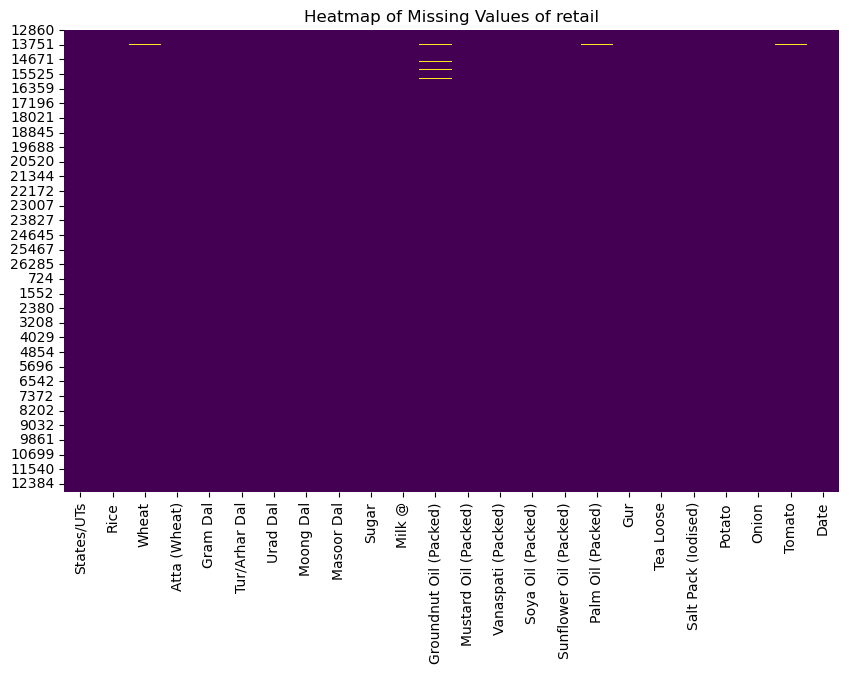

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(retail[retail['States/UTs']=='Assam'].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values of retail')
plt.show()

In [5]:
wholesale

States/UTs     Rice    Wheat Atta (Wheat) Gram Dal  \
0            Average Price  3321.02  2716.01      3029.66  6514.59   
1            Maximum Price     5300     4000         6200    10500   
2            Minimum Price     1800     1600         1550     5300   
3              Modal Price     3000     3200         3000     6000   
4      Andaman and Nicobar     3900     3600         6075     7750   
...                    ...      ...      ...          ...      ...   
26328            Telangana  4843.75  3601.11      3705.56  7905.56   
26329              Tripura   3587.5                  3370  9233.33   
26330        Uttar Pradesh  3500.07  2480.85      2936.18  7901.69   
26331          Uttarakhand     2861     2291      2506.67  7366.67   
26332          West Bengal  4014.76  2617.78      3405.24  8252.38   

      Tur/Arhar Dal  Urad Dal Moong Dal Masoor Dal    Sugar  ...  \
0          10122.72   9778.26   9187.35    8758.39  3866.51  ...   
1             12700     12700     11950      11200     4600  ...   
2              6800      7000      7200       6450     3200  ...   
3             10000      9500      9000       9000     3800  ...   
4             10600     11700     10700      10200     4550  ...   
...             ...       ...       ...        ...      ...  ...   
26328      15242.22  11827.78  10728.89    8422.22  3605.56  ...   
26329      15266.67     12000     10275       9450   4412.5  ...   
26330      14742.69  10792.06  10142.71     7908.6  4103.82  ...   
26331      15066.67     11084     11250       8250  3811.67  ...   
26332      15695.24  11671.43  10945.71    8830.95  4265.24  ...   

      Soya Oil (Packed) Sunflower Oil (Packed) Palm Oil (Packed)      Gur  \
0              14601.67               16769.32          12410.34  4344.34   
1                 19500                  22711             17500     9000   
2                 11000                  12700              8500     3000   
3                 14000                  18000             12500     4000   
4                                        18890             14835     6325   
...                 ...                    ...               ...      ...   
26328          10487.83                10462.5           8988.63  4527.78   
26329             10800                  12700           9483.33     5775   
26330          11443.24               12962.37           9796.06  4550.15   
26331          12050.33               14112.67                       4332   
26332             10400               11742.86           9305.56   4738.1   

      Tea Loose Salt Pack (Iodised)   Potato    Onion   Tomato        Date  
0      24803.87             1642.31  2166.81  1973.75  2580.55  30-08-2022  
1         51934                2600     4500     5200     6000  30-08-2022  
2         12500                 600      800      750      575  30-08-2022  
3         28000                1000     1800     1800     2500  30-08-2022  
4         29500                1750     4250     3250     4750  30-08-2022  
...         ...                 ...      ...      ...      ...         ...  
26328     27300              1632.5  3122.22   3912.5  3044.44  30-08-2024  
26329     18025                 885     2875     5375     5725  30-08-2024  
26330  21557.51             2384.63  2555.72  3725.59  3562.87  30-08-2024  
26331  26067.33                2440     2350  3566.67     4400  30-08-2024  
26332  23723.81             2004.76  2645.24  4214.19     4310  30-08-2024  

[26333 rows x 24 columns]

In [6]:
wholesale.drop_duplicates(inplace=True)
wholesale = wholesale.drop([0])
wholesale=wholesale.reset_index().drop(columns=['index'])
wholesale['Date'] = pd.to_datetime(wholesale['Date'], dayfirst=True)

exclude_columns = ['States/UTs','Date']
wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)] = wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)].replace(' ', pd.NA)

# Convert to numeric, coercing errors to NaN
wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)] = wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)].apply(pd.to_numeric, errors='coerce')

# Convert to float
wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)] = wholesale.loc[:, ~wholesale.columns.isin(exclude_columns)].astype(float)

# Divide by 100


wholesale=wholesale.sort_values(by='Date')
wholesale

States/UTs     Rice    Wheat Atta (Wheat) Gram Dal Tur/Arhar Dal  \
0      Maximum Price   5300.0   4000.0       6200.0  10500.0       12700.0   
20       Maharashtra  3414.29  2971.43      3642.86  6171.43      10242.86   
21           Manipur   4100.0   2000.0       1550.0   7500.0       10500.0   
22         Meghalaya   2345.0   3200.0       3080.0   7250.0       8933.33   
23          Nagaland   2150.0   3400.0       3700.0   8100.0       10800.0   
...              ...      ...      ...          ...      ...           ...   
26308            Goa   5050.0   3900.0       3400.0   9550.0       16500.0   
26309        Gujarat   3350.0  3008.33      3183.33   8300.0      15583.33   
26310        Haryana   3400.0   2600.0       3050.0   8350.0       15250.0   
26302          Assam  3822.37  2971.43      3153.05  8615.79      15839.47   
26331    West Bengal  4014.76  2617.78      3405.24  8252.38      15695.24   

       Urad Dal Moong Dal Masoor Dal    Sugar  ... Soya Oil (Packed)  \
0       12700.0   11950.0    11200.0   4600.0  ...           19500.0   
20      9757.14   9328.57    8771.43  3641.71  ...          13164.43   
21      11000.0   10000.0     9300.0   4500.0  ...           15700.0   
22     10433.33  10166.67     8750.0   4175.0  ...          14129.25   
23       9600.0    9800.0     9250.0   4450.0  ...           16600.0   
...         ...       ...        ...      ...  ...               ...   
26308   12500.0   10750.0     8300.0   4050.0  ...               NaN   
26309   11800.0  10483.33    7733.33   3975.0  ...          10958.33   
26310   11000.0   10100.0     8000.0   4200.0  ...           11544.0   
26302  10317.65  10896.05    8465.79   4360.0  ...          12067.11   
26331  11671.43  10945.71    8830.95  4265.24  ...           10400.0   

      Sunflower Oil (Packed) Palm Oil (Packed)      Gur Tea Loose  \
0                    22711.0           17500.0   9000.0   51934.0   
20                  16364.43          12258.33  4071.43  24121.43   
21                       NaN           14000.0      NaN       NaN   
22                   19750.0           14500.0  6666.67   31000.0   
23                   20000.0           15500.0   6400.0   20100.0   
...                      ...               ...      ...       ...   
26308                10700.0            8900.0   4700.0       NaN   
26309               11154.17           8958.33  4941.67  20266.67   
26310                12593.5            9435.0   4450.0   21000.0   
26302                13611.0           9989.93  4963.16  22080.74   
26331               11742.86           9305.56   4738.1  23723.81   

      Salt Pack (Iodised)   Potato    Onion   Tomato       Date  
0                  2600.0   4500.0   5200.0   6000.0 2022-08-30  
20                1764.71  2142.86  1528.57  2042.86 2022-08-30  
21                  700.0   2800.0   2700.0      NaN 2022-08-30  
22                 2095.0   2425.0   3575.0  3933.33 2022-08-30  
23                 1350.0   2600.0   3200.0   4750.0 2022-08-30  
...                   ...      ...      ...      ...        ...  
26308              1900.0   3600.0   4250.0   3350.0 2024-08-30  
26309             1416.67  2933.33  3483.33  3633.33 2024-08-30  
26310              2500.0   3100.0   4000.0   4100.0 2024-08-30  
26302              991.58  2931.58  4683.58  5090.95 2024-08-30  
26331             2004.76  2645.24  4214.19   4310.0 2024-08-30  

[26332 rows x 24 columns]

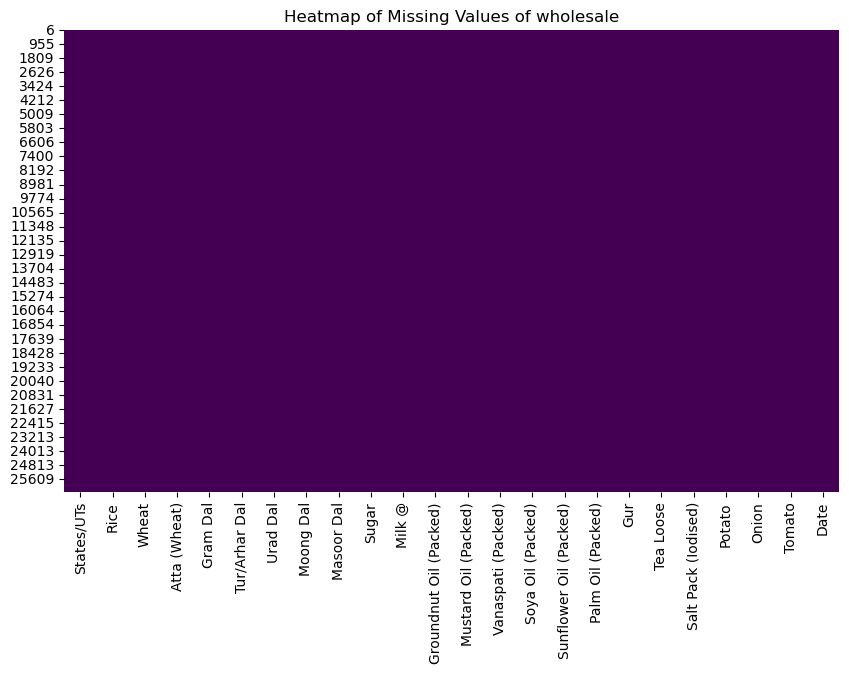

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(wholesale[wholesale['States/UTs']=='Assam'].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values of wholesale')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

crops = ['Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal', 'Urad Dal',
         'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @', 'Groundnut Oil (Packed)',
         'Mustard Oil (Packed)', 'Vanaspati (Packed)', 'Soya Oil (Packed)',
         'Sunflower Oil (Packed)', 'Palm Oil (Packed)', 'Gur', 'Tea Loose',
         'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato']

exclude_columns = ['States/UTs', 'Date']
def fill_missing_with_regression(data, target_column):
    X = data.index.values.reshape(-1, 1)  # Using the index as the feature
    y = data[target_column]
    
    missing_idx = y.isna()
    non_missing_idx = ~missing_idx
    if non_missing_idx.sum() == 0:
        # If all values are missing, fill with mean
        data.loc[missing_idx, target_column] = y.mean()
        return data
    
    model = LinearRegression()
    model.fit(X[non_missing_idx], y[non_missing_idx])
    
    if missing_idx.sum() > 0:
        data.loc[missing_idx, target_column] = model.predict(X[missing_idx])
    
    return data
# Fill missing values in retail and wholesale datasets
for crop in crops:
     if crop in retail.columns and crop in wholesale.columns:
        for state in retail['States/UTs'].unique():
            # Process retail data, excluding the date column
            state_retail = retail[retail['States/UTs'] == state].copy()
            state_retail = fill_missing_with_regression(state_retail, crop)
            # Ensure proper index alignment
            retail.loc[retail['States/UTs'] == state, crop] = state_retail[crop].values
            # Process wholesale data, excluding the date column
            state_wholesale = wholesale[wholesale['States/UTs'] == state].copy()
            state_wholesale = fill_missing_with_regression(state_wholesale, crop)

# Select only numeric columns for type conversion
numeric_columns_retail = retail.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_wholesale = wholesale.select_dtypes(include=['float64', 'int64']).columns

# Convert numeric columns to float (ensure correct data types)
retail[numeric_columns_retail] = retail[numeric_columns_retail].astype(float)
wholesale[numeric_columns_wholesale] = wholesale[numeric_columns_wholesale].astype(float)

# Divide wholesale prices by 100, excluding non-numeric columns
wholesale[numeric_columns_wholesale] /= 100

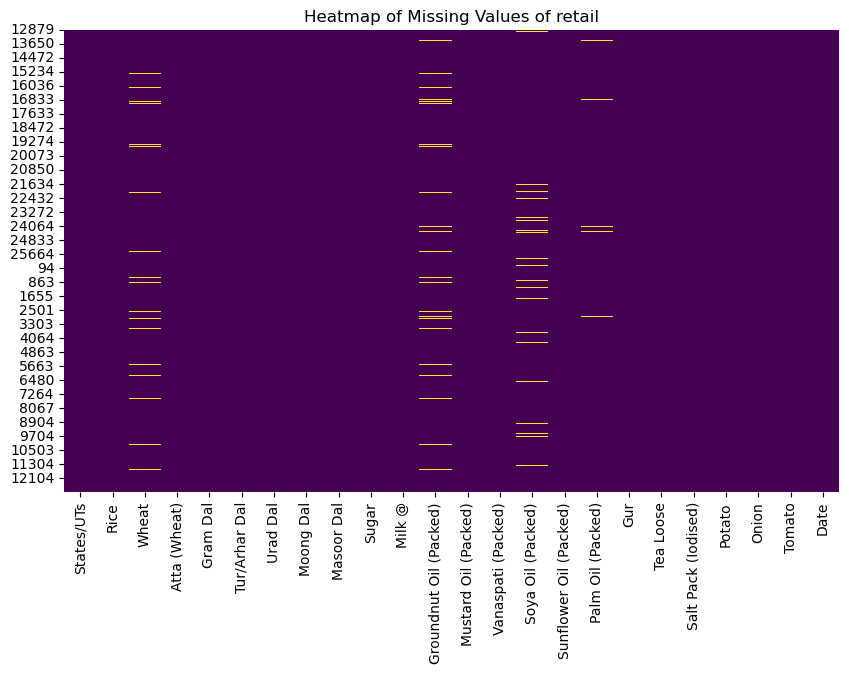

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(retail.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values of retail')
plt.show()

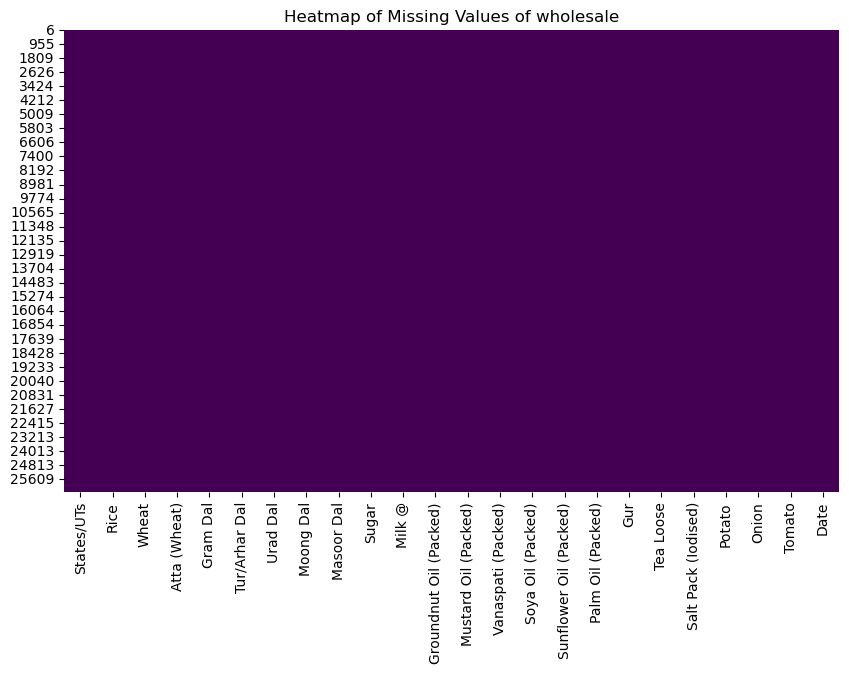

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(wholesale[wholesale['States/UTs']=='Assam'].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values of wholesale')
plt.show()

In [11]:
retail

States/UTs   Rice  Wheat Atta (Wheat) Gram Dal Tur/Arhar Dal  \
12879            Odisha  32.56  34.38        35.78    68.67        109.22   
12873    Madhya Pradesh  32.91   26.0         31.0    67.64        100.09   
12875           Manipur   41.0   34.0         38.0     75.0         105.0   
12876         Meghalaya  27.75  35.25        33.75     81.5        104.33   
12877           Mizoram   45.0   40.0         40.0    100.0         130.0   
...                 ...    ...    ...          ...      ...           ...   
12830           Haryana  39.67  29.33        36.33     90.0         152.0   
12831  Himachal Pradesh  41.25   22.0        34.33    94.83        174.42   
12823             Bihar  37.86  28.22        33.89    85.62        158.57   
12852       West Bengal  43.48   29.2        37.65    87.87         164.0   
26303          Nagaland  40.69  40.13        48.19    97.92        130.25   

      Urad Dal Moong Dal Masoor Dal  Sugar  ... Soya Oil (Packed)  \
12879    98.67     94.56      89.11  43.33  ...             163.0   
12873     92.0     91.45      89.82  40.64  ...            145.82   
12875    120.0     100.0       93.0   45.0  ...             157.0   
12876   115.67    110.67       92.5   45.5  ...             150.5   
12877    130.0     120.0      130.0   53.0  ...             191.0   
...        ...       ...        ...    ...  ...               ...   
12830    121.0    115.33      88.67   44.0  ...             120.0   
12831    134.5    115.92      88.58   46.0  ...             127.3   
12823   121.22    113.78      80.08  44.54  ...            126.08   
12852   123.83    116.13      95.91  45.74  ...            111.91   
26303   122.13    121.67      96.75  50.69  ...        177.611312   

      Sunflower Oil (Packed) Palm Oil (Packed)        Gur   Tea Loose  \
12879                 176.33            128.33      48.67      234.88   
12873                 171.09            121.29      42.36      266.91   
12875                  210.0             140.0  80.305805  232.182421   
12876                  213.5             150.0       75.0      336.75   
12877                  209.0             147.0      120.0       123.0   
...                      ...               ...        ...         ...   
12830                 127.33             97.67       51.0       208.0   
12831                  140.5             112.5      49.92      266.25   
12823                  147.0            105.52      47.86      276.51   
12852                 125.22              98.3      52.96      268.13   
26303             183.807468        158.759391  77.611656  306.797012   

      Salt Pack (Iodised)     Potato      Onion     Tomato       Date  
12879               23.33      24.78      23.22      32.44 2022-08-30  
12873                19.0      23.09       20.0      28.45 2022-08-30  
12875                14.0       28.0       27.0       60.0 2022-08-30  
12876               23.25      29.75      44.25      48.25 2022-08-30  
12877                25.0       40.0       60.0       60.0 2022-08-30  
...                   ...        ...        ...        ...        ...  
12830                26.0      36.33      48.67      51.67 2024-08-30  
12831               27.75      38.08      54.83      47.67 2024-08-30  
12823               23.06      33.41       42.7      51.19 2024-08-30  
12852               22.26      30.13      48.74      50.35 2024-08-30  
26303           17.724378  33.903709  40.930347  75.797498        NaT  

[26372 rows x 24 columns]

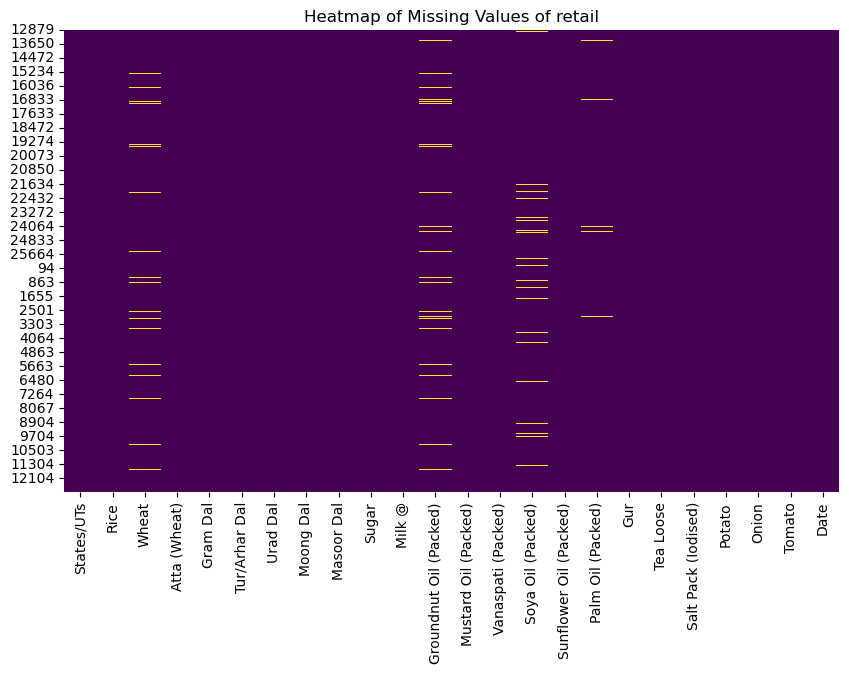

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(retail.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values of retail')
plt.show()

In [13]:
wholesale.dtypes

States/UTs                        object
Rice                              object
Wheat                             object
Atta (Wheat)                      object
Gram Dal                          object
Tur/Arhar Dal                     object
Urad Dal                          object
Moong Dal                         object
Masoor Dal                        object
Sugar                             object
Milk @                            object
Groundnut Oil (Packed)            object
Mustard Oil (Packed)              object
Vanaspati (Packed)                object
Soya Oil (Packed)                 object
Sunflower Oil (Packed)            object
Palm Oil (Packed)                 object
Gur                               object
Tea Loose                         object
Salt Pack (Iodised)               object
Potato                            object
Onion                             object
Tomato                            object
Date                      datetime64[ns]
dtype: object

In [14]:
def cropd(df):    
    unique_states= df['States/UTs'].unique()
    unique_states=unique_states[4:]
    datasets={}
    for st in unique_states:
        date_df = df[df['States/UTs'] == st]
        datasets[st] = date_df
    crops=df.columns.tolist()
    dicto={}
    for st in unique_states:
        cros={}
        for crop in crops:
            dfo=datasets[st][[crop,'Date']]
            cros[crop]=dfo
        dicto[st]=cros
    return dicto,unique_states

In [15]:
p,us1 = cropd(retail)
q,us2 = cropd(wholesale)

In [16]:
for st in us2:
    print(st+''+str(q[st]['Rice'].count()))

NagalandRice    631
Date    633
dtype: int64
OdishaRice    732
Date    732
dtype: int64
PuducherryRice    582
Date    583
dtype: int64
Madhya PradeshRice    732
Date    732
dtype: int64
RajasthanRice    732
Date    732
dtype: int64
Tamil NaduRice    732
Date    732
dtype: int64
TelanganaRice    732
Date    732
dtype: int64
TripuraRice    675
Date    675
dtype: int64
Uttar PradeshRice    732
Date    732
dtype: int64
UttarakhandRice    708
Date    708
dtype: int64
West BengalRice    732
Date    732
dtype: int64
SikkimRice    706
Date    706
dtype: int64
KeralaRice    556
Date    556
dtype: int64
PunjabRice    732
Date    732
dtype: int64
JharkhandRice    732
Date    732
dtype: int64
KarnatakaRice    732
Date    732
dtype: int64
Minimum PriceRice    732
Date    732
dtype: int64
Modal PriceRice    732
Date    732
dtype: int64
Andaman and NicobarRice    656
Date    656
dtype: int64
Andhra PradeshRice    731
Date    731
dtype: int64
AssamRice    724
Date    724
dtype: int64
BiharRice    732


In [17]:
for st in us1:
    print(st+''+str(p[st]['Rice'].count()))

MizoramRice    701
Date    701
dtype: int64
NagalandRice    634
Date    633
dtype: int64
PuducherryRice    599
Date    599
dtype: int64
PunjabRice    731
Date    731
dtype: int64
RajasthanRice    731
Date    731
dtype: int64
SikkimRice    705
Date    705
dtype: int64
Tamil NaduRice    731
Date    731
dtype: int64
TelanganaRice    731
Date    731
dtype: int64
TripuraRice    672
Date    672
dtype: int64
Uttar PradeshRice    731
Date    731
dtype: int64
UttarakhandRice    706
Date    706
dtype: int64
West BengalRice    731
Date    731
dtype: int64
KeralaRice    556
Date    556
dtype: int64
KarnatakaRice    732
Date    732
dtype: int64
MaharashtraRice    732
Date    732
dtype: int64
Jammu and KashmirRice    678
Date    678
dtype: int64
Average PriceRice    732
Date    732
dtype: int64
Maximum PriceRice    732
Date    732
dtype: int64
Minimum PriceRice    732
Date    732
dtype: int64
Modal PriceRice    732
Date    732
dtype: int64
Andaman and NicobarRice    668
Date    668
dtype: int64
Andh

In [18]:
retail.dtypes

States/UTs                        object
Rice                              object
Wheat                             object
Atta (Wheat)                      object
Gram Dal                          object
Tur/Arhar Dal                     object
Urad Dal                          object
Moong Dal                         object
Masoor Dal                        object
Sugar                             object
Milk @                            object
Groundnut Oil (Packed)            object
Mustard Oil (Packed)              object
Vanaspati (Packed)                object
Soya Oil (Packed)                 object
Sunflower Oil (Packed)            object
Palm Oil (Packed)                 object
Gur                               object
Tea Loose                         object
Salt Pack (Iodised)               object
Potato                            object
Onion                             object
Tomato                            object
Date                      datetime64[ns]
dtype: object

In [19]:
import plotly.graph_objects as go
from IPython.display import display, HTML

# List of crops to analyze
crops = ['Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal', 'Urad Dal',
         'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @', 'Groundnut Oil (Packed)',
         'Mustard Oil (Packed)', 'Vanaspati (Packed)', 'Soya Oil (Packed)',
         'Sunflower Oil (Packed)', 'Palm Oil (Packed)', 'Gur', 'Tea Loose',
         'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato']

# Function to create and display the plot
def plot_crops(data, title):
    # Filter the data for the year 2023
    if 'Date' in data.columns:
        data_2023 = data

        # Further filter data for Bihar
        data_2023_bihar = data_2023[data_2023['States/UTs'] == 'Assam']

        # Create a figure for the plots
        fig = go.Figure()

        # Plot trends for each crop
        for crop in crops:
            crop_data = data_2023_bihar[['Date', crop]].dropna()
            fig.add_trace(go.Scatter(
                x=crop_data['Date'],
                y=crop_data[crop],
                mode='lines+markers',
                name=f'{crop} - Price',
                visible='legendonly'  # Start with all traces hidden
            ))

        fig.update_layout(
            title=title,
            xaxis_title='Date',
            yaxis_title='Price',
            legend_title='Crops'
        )

        # Set the x-axis range to the year 2023
        # fig.update_xaxes(range=['2023-01-01', '2023-12-31'])
        fig.show()

        # JavaScript for interactive hover effect
        hover_js = """
        <script>
            var myPlot = document.getElementsByClassName('plotly-graph-div')[0];

            myPlot.on('plotly_hover', function(data){
                var index = data.points[0].curveNumber;
                Plotly.restyle(myPlot, 'opacity', Array.from({length: data.points.length}, (_, i) => i === index ? 1 : 0.2));
            });

            myPlot.on('plotly_unhover', function(data){
                Plotly.restyle(myPlot, 'opacity', 0.2);
            });
        </script>
        """

        display(HTML(hover_js))

# Example usage with retail and wholesale data
plot_crops(retail, 'Price Trends of Crops in Assam (2023) - Retail')
plot_crops(wholesale, 'Price Trends of Crops in Assam (2023) - Wholesale')


c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\si

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\si

In [20]:
import plotly.graph_objects as go
from IPython.display import display, HTML

# List of crops to analyze
crops = ['Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal', 'Urad Dal',
         'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @', 'Groundnut Oil (Packed)',
         'Mustard Oil (Packed)', 'Vanaspati (Packed)', 'Soya Oil (Packed)',
         'Sunflower Oil (Packed)', 'Palm Oil (Packed)', 'Gur', 'Tea Loose',
         'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato']

# Function to create and display the plot
def plot_crops_comparison(retail_data, wholesale_data, title):
    # Filter and prepare retail data for 2023
    if 'Date' in retail_data.columns:
        retail_data_2023 = retail_data[retail_data['Date'].dt.year == 2023]
        retail_data_2023_bihar = retail_data_2023[retail_data_2023['States/UTs'] == 'Bihar']
        
    # Filter and prepare wholesale data for 2023
    if 'Date' in wholesale_data.columns:
        wholesale_data_2023 = wholesale_data[wholesale_data['Date'].dt.year == 2023]
        wholesale_data_2023_bihar = wholesale_data_2023[wholesale_data_2023['States/UTs'] == 'Bihar']

    # Create a figure for the plots
    fig = go.Figure()

    # Plot trends for each crop
    for crop in crops:
        # Retail data trace
        crop_retail_data = retail_data_2023_bihar[['Date', crop]].dropna()
        fig.add_trace(go.Scatter(
            x=crop_retail_data['Date'],
            y=crop_retail_data[crop],
            mode='lines+markers',
            name=f'{crop} - Retail',
            visible='legendonly'  # Start with all traces hidden
        ))

        # Wholesale data trace
        crop_wholesale_data = wholesale_data_2023_bihar[['Date', crop]].dropna()
        fig.add_trace(go.Scatter(
            x=crop_wholesale_data['Date'],
            y=crop_wholesale_data[crop],
            mode='lines+markers',
            name=f'{crop} - Wholesale',
            visible='legendonly'  # Start with all traces hidden
        ))

    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Crops'
    )

    # Set the x-axis range to the year 2023
    fig.update_xaxes(range=['2023-01-01', '2023-12-31'])
    fig.show()

    # JavaScript for interactive hover effect
    hover_js = """
    <script>
        var myPlot = document.getElementsByClassName('plotly-graph-div')[0];

        myPlot.on('plotly_hover', function(data){
            var index = data.points[0].curveNumber;
            Plotly.restyle(myPlot, 'opacity', Array.from({length: data.points.length}, (_, i) => i === index ? 1 : 0.2));
        });

        myPlot.on('plotly_unhover', function(data){
            Plotly.restyle(myPlot, 'opacity', 0.2);
        });
    </script>
    """

    display(HTML(hover_js))

# Example usage with retail and wholesale data
plot_crops_comparison(retail, wholesale, 'Price Trends of Crops in Bihar (2023) - Retail vs Wholesale')


c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\si

In [21]:
import plotly.graph_objects as go
from IPython.display import display, HTML

# List of crops to analyze
crops = ['Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal', 'Urad Dal',
         'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @', 'Groundnut Oil (Packed)',
         'Mustard Oil (Packed)', 'Vanaspati (Packed)', 'Soya Oil (Packed)',
         'Sunflower Oil (Packed)', 'Palm Oil (Packed)', 'Gur', 'Tea Loose',
         'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato']

# Function to create and display the plot
def plot_price_differences(retail_data, wholesale_data, title):
    # Filter and prepare retail data for 2023
    if 'Date' in retail_data.columns:
        retail_data_2023 = retail_data[retail_data['Date'].dt.year == 2023]
        retail_data_2023_bihar = retail_data_2023[retail_data_2023['States/UTs'] == 'Bihar']
        
    # Filter and prepare wholesale data for 2023
    if 'Date' in wholesale_data.columns:
        wholesale_data_2023 = wholesale_data[wholesale_data['Date'].dt.year == 2023]
        wholesale_data_2023_bihar = wholesale_data_2023[wholesale_data_2023['States/UTs'] == 'Bihar']

    # Create a figure for the plots
    fig = go.Figure()

    # Plot differences for each crop
    for crop in crops:
        # Retail data trace
        crop_retail_data = retail_data_2023_bihar[['Date', crop]].dropna()
        crop_wholesale_data = wholesale_data_2023_bihar[['Date', crop]].dropna()

        # Merge retail and wholesale data on Date
        merged_data = crop_retail_data.merge(crop_wholesale_data, on='Date', suffixes=('_retail', '_wholesale'))
        merged_data['Difference'] = merged_data[crop + '_retail'] - merged_data[crop + '_wholesale']

        # Plot the difference
        fig.add_trace(go.Scatter(
            x=merged_data['Date'],
            y=merged_data['Difference'],
            mode='lines+markers',
            name=f'{crop} - Difference',
            visible='legendonly'  # Start with all traces hidden
        ))

    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price Difference',
        legend_title='Crops'
    )

    # Set the x-axis range to the year 2023
    fig.update_xaxes(range=['2023-01-01', '2023-12-31'])
    fig.show()

    # JavaScript for interactive hover effect
    hover_js = """
    <script>
        var myPlot = document.getElementsByClassName('plotly-graph-div')[0];

        myPlot.on('plotly_hover', function(data){
            var index = data.points[0].curveNumber;
            Plotly.restyle(myPlot, 'opacity', Array.from({length: data.points.length}, (_, i) => i === index ? 1 : 0.2));
        });

        myPlot.on('plotly_unhover', function(data){
            Plotly.restyle(myPlot, 'opacity', 0.2);
        });
    </script>
    """

    display(HTML(hover_js))

# Example usage with retail and wholesale data
plot_price_differences(retail, wholesale, 'Price Difference of Crops in Bihar (2023)')


c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\si

In [22]:
import plotly.graph_objects as go
from IPython.display import display, HTML

# Function to create and display the plot for all states
def plot_crops_comparison_all_states(retail_data, wholesale_data, crop_type, title):
    # Filter and prepare retail data for 2023
    if 'Date' in retail_data.columns:
        retail_data_2023 = retail_data[retail_data['Date'].dt.year == 2023]
        
    # Filter and prepare wholesale data for 2023
    if 'Date' in wholesale_data.columns:
        wholesale_data_2023 = wholesale_data[wholesale_data['Date'].dt.year == 2023]

    # Create a figure for the plots
    fig = go.Figure()

    # Get unique states from retail data
    states = retail_data_2023['States/UTs'].unique()

    # Plot trends for the selected crop across all states
    for state in states:
        # Filter data for the current state
        retail_data_state = retail_data_2023[retail_data_2023['States/UTs'] == state]
        wholesale_data_state = wholesale_data_2023[wholesale_data_2023['States/UTs'] == state]

        if crop_type in retail_data_state.columns:
            # Retail data trace
            crop_retail_data = retail_data_state[['Date', crop_type]].dropna()
            fig.add_trace(go.Scatter(
                x=crop_retail_data['Date'],
                y=crop_retail_data[crop_type],
                mode='lines+markers',
                name=f'{state} - {crop_type} - Retail',
                visible='legendonly'  # Start with all traces hidden
            ))

            # Wholesale data trace
            crop_wholesale_data = wholesale_data_state[['Date', crop_type]].dropna()
            fig.add_trace(go.Scatter(
                x=crop_wholesale_data['Date'],
                y=crop_wholesale_data[crop_type],
                mode='lines+markers',
                name=f'{state} - {crop_type} - Wholesale',
                visible='legendonly'  # Start with all traces hidden
            ))

    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='States'
    )

    # Set the x-axis range to the year 2023
    fig.update_xaxes(range=['2023-01-01', '2023-12-31'])
    fig.show()

    # JavaScript for interactive hover effect
    hover_js = """
    <script>
        var myPlot = document.getElementsByClassName('plotly-graph-div')[0];

        myPlot.on('plotly_hover', function(data){
            var index = data.points[0].curveNumber;
            Plotly.restyle(myPlot, 'opacity', Array.from({length: data.points.length}, (_, i) => i === index ? 1 : 0.2));
        });

        myPlot.on('plotly_unhover', function(data){
            Plotly.restyle(myPlot, 'opacity', 0.2);
        });
    </script>
    """

    display(HTML(hover_js))

# Example usage with retail and wholesale data
plot_crops_comparison_all_states(retail, wholesale, 'Rice', 'Price Trends of Rice Across States (2023) - Retail vs Wholesale')


c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\91934\anaconda3\Lib\si

In [23]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Let's focus on a single crop for illustration
crop = 'Tur/Arhar Dal'
state = 'Assam'

# Extract the time series data for retail and wholesale prices
retail_prices = retail[retail['States/UTs'] == state][[crop, 'Date']]
wholesale_prices = wholesale[wholesale['States/UTs'] == state][[crop, 'Date']]

# Ensure 'Date' is a DateTime index with a frequency
retail_prices['Date'] = pd.to_datetime(retail_prices['Date'])
wholesale_prices['Date'] = pd.to_datetime(wholesale_prices['Date'])
retail_prices.set_index('Date', inplace=True)
wholesale_prices.set_index('Date', inplace=True)

# Set frequency explicitly for the time series data (assuming monthly data)
retail_prices = retail_prices.asfreq('D')
wholesale_prices = wholesale_prices.asfreq('D')

# Ensure the data is numeric
retail_prices[crop] = pd.to_numeric(retail_prices[crop], errors='coerce')
wholesale_prices[crop] = pd.to_numeric(wholesale_prices[crop], errors='coerce')

# Drop missing values in both datasets
retail_prices.dropna(inplace=True)
wholesale_prices.dropna(inplace=True)

# Align the indices of retail and wholesale prices
retail_prices, wholesale_prices = retail_prices.align(wholesale_prices, join='inner')
retail_prices[crop]*=10000
wholesale_prices[crop]*=10000
wholesale_prices[crop]

Date
2022-08-30     99500000.0
2022-08-31     99500000.0
2022-09-01     99500000.0
2022-09-02     99500000.0
2022-09-03     99500000.0
                 ...     
2024-08-26    160675000.0
2024-08-27    159562500.0
2024-08-28    159604200.0
2024-08-29    159395800.0
2024-08-30    158394700.0
Name: Tur/Arhar Dal, Length: 724, dtype: float64

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\91934\AppData\Local\Temp\ipykernel_15920\236759543.py:18: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next v

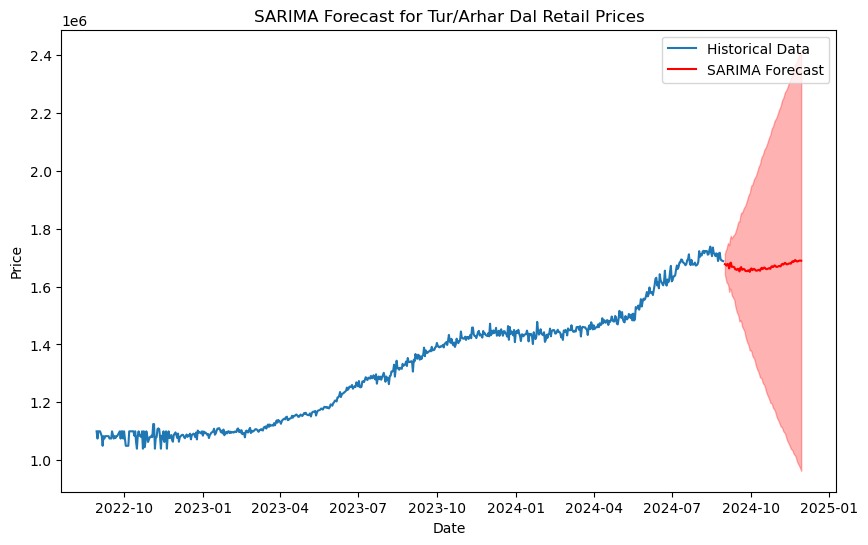

                                     SARIMAX Results                                      
Dep. Variable:                      Tur/Arhar Dal   No. Observations:                  724
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8026.346
Date:                            Thu, 05 Sep 2024   AIC                          16062.692
Time:                                    22:48:26   BIC                          16085.526
Sample:                                         0   HQIC                         16071.512
                                            - 724                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0321      0.124      0.259      0.796      -0.211       0.275
ma.L1         -0.1398      0.124   

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(retail_prices[crop], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future values
forecast_steps = 90  # Define the number of future periods to forecast

# Set forecast start date to September 2024
forecast_start_date = pd.Timestamp('2024-09-01')
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='D')

# Forecast with exogenous wholesale prices for the forecast period
wholesale_forecast = wholesale_prices[crop].reindex(forecast_index).fillna(method='ffill')
forecast = model_fit.get_forecast(steps=forecast_steps)

forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame with forecasted mean and confidence intervals
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Price': forecast_mean,
    'Lower CI': forecast_conf_int.iloc[:, 0],
    'Upper CI': forecast_conf_int.iloc[:, 1]
})

# Set the Date column as the index
forecast_df.set_index('Date', inplace=True)

# Save the forecast data to a CSV file
forecast_df.to_csv('forecasted_prices.csv')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(retail_prices.index, retail_prices[crop], label='Historical Data')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title(f'SARIMA Forecast for {crop} Retail Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Print model summary
print(model_fit.summary())


In [25]:
retail_prices

Tur/Arhar Dal
Date                     
2022-08-30      1100000.0
2022-08-31      1075000.0
2022-09-01      1100000.0
2022-09-02      1100000.0
2022-09-03      1100000.0
...                   ...
2024-08-26      1716700.0
2024-08-27      1692800.0
2024-08-28      1691500.0
2024-08-29      1688400.0
2024-08-30      1687700.0

[724 rows x 1 columns]

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\91934\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



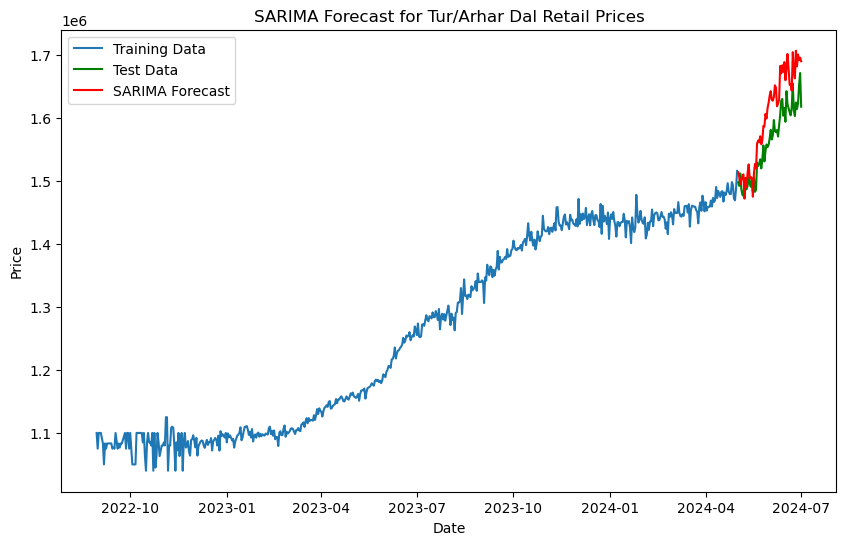

                                     SARIMAX Results                                      
Dep. Variable:                      Tur/Arhar Dal   No. Observations:                  603
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6408.440
Date:                            Thu, 05 Sep 2024   AIC                          12828.879
Time:                                    22:48:30   BIC                          12855.160
Sample:                                         0   HQIC                         12839.117
                                            - 603                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Tur/Arhar Dal     0.0105      0.000     95.455      0.000       0.010       0.011
ar.L1             0.1510  

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Split the data into training and testing sets
train_end_date = '2024-05-01'  # Train the model until this date
test_end_date = '2024-07-01'   # Test the model on the next 3 months

train_data = retail_prices[retail_prices.index <= train_end_date]
test_data = retail_prices[(retail_prices.index > train_end_date) & (retail_prices.index <= test_end_date)]

# Exogenous variable
exog_train = wholesale_prices[wholesale_prices.index <= train_end_date][crop]
exog_test = wholesale_prices[(wholesale_prices.index > train_end_date) & (wholesale_prices.index <= test_end_date)][crop]

# Step 2: Fit SARIMA model on the training set with exogenous variable
model = SARIMAX(train_data[crop], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Step 3: Forecast future values (3 months = ~90 days)
forecast_steps = len(test_data)  # 3 months of data

# Set forecast start date to May 2, 2024 (right after training period)
forecast_start_date = pd.Timestamp('2024-05-02')
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='D')

# Forecast using the trained model with exogenous variable
forecast = model_fit.get_forecast(steps=forecast_steps, exog=exog_test)

# Get the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Step 4: Compare forecast with actual test data (if available)
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[crop], label='Training Data')
plt.plot(test_data.index, test_data[crop], label='Test Data', color='green')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', color='red')
# plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title(f'SARIMAX Forecast for {crop} Retail Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Print the model summary
print(model_fit.summary())

# Step 5: Calculate error metrics to evaluate the forecast

# Ensure forecast index matches the test data index
forecast_mean.index = test_data.index

# Calculate error metrics
mae = mean_absolute_error(test_data[crop], forecast_mean)
mse = mean_squared_error(test_data[crop], forecast_mean)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

